In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("./data/titanic_clean.csv", encoding ="cp949")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,E_C,E_Q,E_S
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S,1,2,0,0,1
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0,0,1
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3.0,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2.0,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S,1,2,0,0,1
887,888,1,1.0,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,2,0,0,1
888,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S,0,2,0,0,1
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,0,1,0,0


In [7]:
titanic_df = sns.load_dataset("titanic")
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
# 범주형 데이터
categorical_cols = ["sex","embarked","class","who","adult_male","deck","embark_town","alive","alone"]
titanic_df[categorical_cols]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


##### Quiz
- 연속형 범주 

In [11]:
numeric_cols = ["age","sibsp","parch","fare"]
titanic_df[numeric_cols]

,age,sibsp,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,NaN,1,2,23.4500
889,26.0,0,0,30.0000


###  데이터 통계량 살펴보기
- describe() 함수로 각 열에 대한 대략적익 통계 값들을 볼 수 있음

In [12]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
titanic_df["who"].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [19]:
# 문제 각 칼럼 한꺼번에 value_counts 나오게 하기
for i in categorical_cols:
    print(f'column : {i}')
    print(titanic_df[i].value_counts())
    print("-"*80)

column : sex
male      577
female    314
Name: sex, dtype: int64
--------------------------------------------------------------------------------
column : embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64
--------------------------------------------------------------------------------
column : class
Third     491
First     216
Second    184
Name: class, dtype: int64
--------------------------------------------------------------------------------
column : who
man      537
woman    271
child     83
Name: who, dtype: int64
--------------------------------------------------------------------------------
column : adult_male
True     537
False    354
Name: adult_male, dtype: int64
--------------------------------------------------------------------------------
column : deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
--------------------------------------------------------------------------------
column : embark_town
Southampton    644
Cher

### 데이터 분포 시각화
수치형 칼럼들의 분포를 그려보기. 통계량은 boxplot으로 살펴보고, 분포는 histplot으로 그리기

- 반복문을 이용하여 여러개의 차트를 그리기
- plt.subplot를 통해 여러 개의 지도를 그리기

Text(0.5, 1.0, 'distribute age')

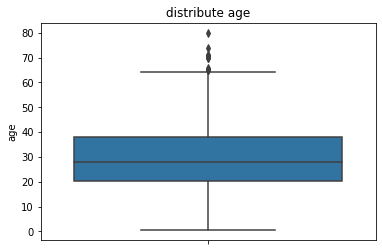

In [21]:
# age 칼럼의 분포 통계량 확인하기
ax = sns.boxplot(data = titanic_df, y = titanic_df["age"], showfliers = True)
ax.set_title("distribute age")

(4,)


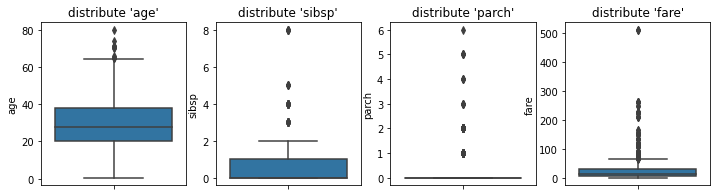

In [24]:
# 수치형 데이터를 하나의 차트에 표현하기, plt.subplots() 활용
figure, ax_list = plt.subplots(nrows = 1, ncols = 4)
figure.set_size_inches(12,3)
print(ax_list.shape)

for i in range(4):
    col = numeric_cols[i]
    sns.boxplot(data = titanic_df, y = titanic_df[col], ax = ax_list[i], showfliers= True)
    ax_list[i].set_title(f"distribute '{col}'")

##### Quiz
- sns.hisplot으로 수치형 데이터의 분포 알아보기

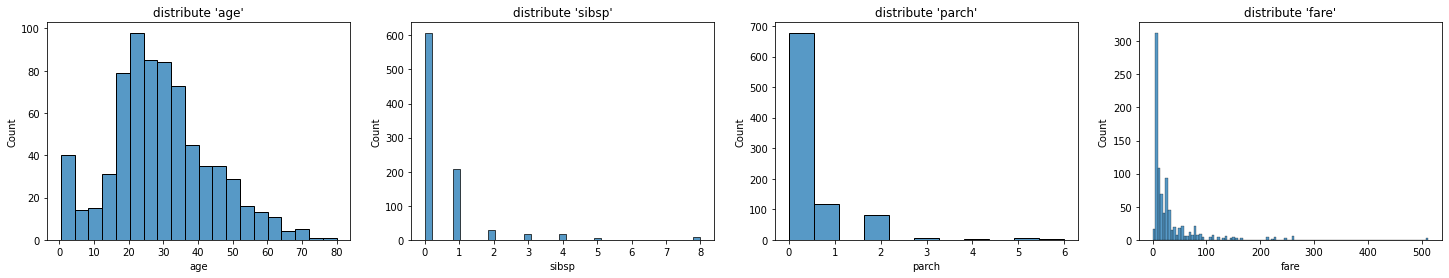

In [31]:
figure, ax_list = plt.subplots(nrows = 1, ncols = 4)
figure.set_size_inches(25,4)

for i in range(4):
    col = numeric_cols[i]
    sns.histplot(data = titanic_df, x = titanic_df[col], ax = ax_list[i])
    ax_list[i].set_title(f"distribute '{col}'")

범주형 칼럼들의 분포 그리기. countplot을 통해 범주별로 개수를 셀 수 있다.

- 범주형 칼럼이 총 9개 이므로, 3x3 도화지 레이아웃으로 하나씩 그래프를 그리자

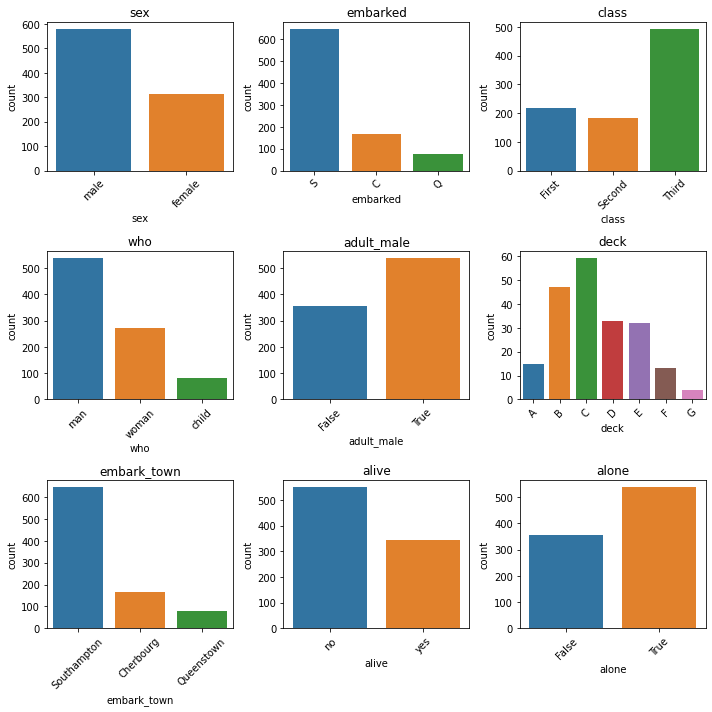

In [32]:
figure, ax_list_list = plt.subplots(nrows =3 ,ncols = 3)
figure.set_size_inches(10,10)
ax_list = ax_list_list.reshape(3*3)

for i in range(len(categorical_cols)):
    col = categorical_cols[i]
    g = sns.countplot(data = titanic_df, x = col, ax=ax_list[i])
    g.set_title(col)
    g.set_xticklabels(g.get_xticklabels(), rotation = 45)

plt.tight_layout()
plt.show()

9개의 범주형 데이터 생존자별 데이터 확인하기

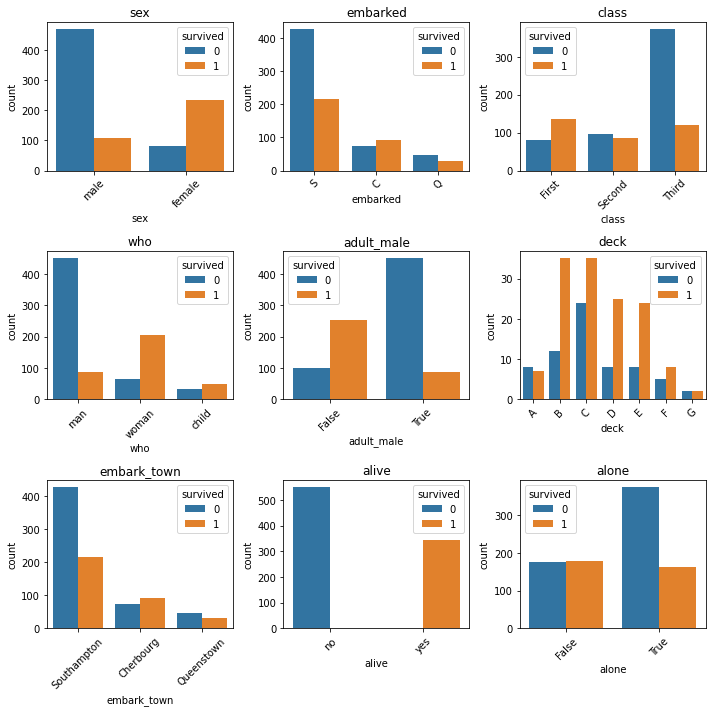

In [33]:
figure, ax_list_list = plt.subplots(nrows =3 ,ncols = 3)
figure.set_size_inches(10,10)
ax_list = ax_list_list.reshape(3*3)

for i in range(len(categorical_cols)):
    col = categorical_cols[i]
    g = sns.countplot(data = titanic_df, x = col, ax=ax_list[i], hue = "survived")
    g.set_title(col)
    g.set_xticklabels(g.get_xticklabels(), rotation = 45)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

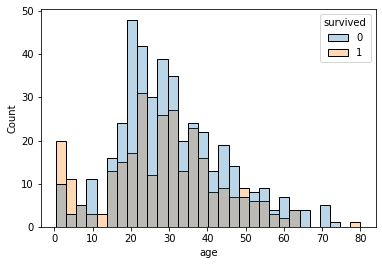

In [35]:
#생존 여부별로 나이의 히스토그램 그리보기
sns.histplot(data = titanic_df, x = "age", hue = "survived", bins = 30, alpha = 0.3)

<AxesSubplot:xlabel='sex', ylabel='age'>

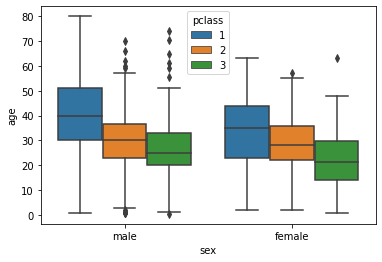

In [38]:
# 성별과 좌석 등급에 따라, 나이의 boxplot 그려보기
sns.boxplot(data = titanic_df, x = "sex", y ="age", hue = "pclass")

## 머신러닝을 위한 데이터 전처리
- 결측 데이터 처리
- 문자형 데이터를 숫자형 데이터로 변형
- 피처 스케일링

In [39]:
titanic_df[categorical_cols].describe()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


In [40]:
titanic_df[numeric_cols].describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


결측치 처리 방법
- age : 평균값으로 
- deck : 최빈값으로
- embarkded : 최빈값으로

In [44]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [45]:
# age : 결측값 > 평균값으로 채워 넣기
titanic_df["age"].fillna(titanic_df["age"].mean(), inplace = True)

# embarked, deck : 최빈값으로 채워 넣기
titanic_df["deck"].fillna(titanic_df["deck"].describe()["top"], inplace = True)
titanic_df["embarked"].fillna(titanic_df["embarked"].describe()["top"], inplace = True)

In [47]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### 문자 데이터 처리

In [50]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [83]:
# 중복칼럼 처리
drop_cols = ["class","embark_town","alive"]
titanic_df_clean = titanic_df.drop(drop_cols, axis = 1)
titanic_df_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,male,22.000000,1,0,7.2500,S,man,True,C,False
1,1,1,female,38.000000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.000000,0,0,7.9250,S,woman,False,C,True
3,1,1,female,35.000000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.000000,0,0,8.0500,S,man,True,C,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,man,True,C,True
887,1,1,female,19.000000,0,0,30.0000,S,woman,False,B,True
888,0,3,female,29.699118,1,2,23.4500,S,woman,False,C,False
889,1,1,male,26.000000,0,0,30.0000,C,man,True,C,True


### 문자열 데이터를 label encoding으로 변환
- label encoding : 1,2,3,... 숫자로 변환

In [84]:
# string type을 numerical type으로
# 알파벳 순으로 0,1,2 순으로 들어간다.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
titanic_df_clean["sex"] = le.fit(titanic_df_clean["sex"]).transform(titanic_df_clean["sex"])
titanic_df_clean["embarked"] = le.fit(titanic_df_clean["embarked"]).transform(titanic_df_clean["embarked"])
titanic_df_clean["who"] = le.fit(titanic_df_clean["who"]).transform(titanic_df_clean["who"])
titanic_df_clean["adult_male"] = le.fit(titanic_df_clean["adult_male"]).transform(titanic_df_clean["adult_male"])
titanic_df_clean["alone"] = le.fit(titanic_df_clean["alone"]).transform(titanic_df_clean["alone"])
titanic_df_clean["deck"] = le.fit(titanic_df_clean["deck"]).transform(titanic_df_clean["deck"])


In [85]:
titanic_df_clean["age"] = titanic_df_clean["age"].astype(int)

In [86]:
titanic_df_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,1,22,1,0,7.2500,2,1,1,2,0
1,1,1,0,38,1,0,71.2833,0,2,0,2,0
2,1,3,0,26,0,0,7.9250,2,2,0,2,1
3,1,1,0,35,1,0,53.1000,2,2,0,2,0
4,0,3,1,35,0,0,8.0500,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,2,1,1,2,1
887,1,1,0,19,0,0,30.0000,2,2,0,1,1
888,0,3,0,29,1,2,23.4500,2,2,0,2,0
889,1,1,1,26,0,0,30.0000,0,1,1,2,1


### 문자형 데이터를 One-hot encoding으로 변환
- one hot encoding : 0 or 1 로 이진 숫자로 변환
- 칼럼 값들이 서로 관련성이 없을 때 사용(명목형일때 사용)
- pd.get_dummies

In [90]:
drop_cols = ["class","embark_town","alive"]
titanic_df_oh = titanic_df.drop(drop_cols, axis = 1)
titanic_df_oh

titanic_df_oh["deck"] = le.fit(titanic_df_oh["deck"]).transform(titanic_df_oh["deck"])

In [91]:
titanic_df_oh = pd.get_dummies(titanic_df_oh, columns=["sex","adult_male","alone","embarked","who"])

In [92]:
titanic_df_oh

,survived,pclass,age,sibsp,parch,fare,deck,sex_female,sex_male,adult_male_False,adult_male_True,alone_False,alone_True,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,22.000000,1,0,7.2500,2,0,1,0,1,1,0,0,0,1,0,1,0
1,1,1,38.000000,1,0,71.2833,2,1,0,1,0,1,0,1,0,0,0,0,1
2,1,3,26.000000,0,0,7.9250,2,1,0,1,0,0,1,0,0,1,0,0,1
3,1,1,35.000000,1,0,53.1000,2,1,0,1,0,1,0,0,0,1,0,0,1
4,0,3,35.000000,0,0,8.0500,2,0,1,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,2,0,1,0,1,0,1,0,0,1,0,1,0
887,1,1,19.000000,0,0,30.0000,1,1,0,1,0,0,1,0,0,1,0,0,1
888,0,3,29.699118,1,2,23.4500,2,1,0,1,0,1,0,0,0,1,0,0,1
889,1,1,26.000000,0,0,30.0000,2,0,1,0,1,0,1,1,0,0,0,1,0


### train_data, test_data 만들기
- stratify : class의 비율을 train과 validation을 일정하게 유지함. 한쪽을 쏠리는 것을 방지(stratify = target, default = None)

In [87]:
# 보통 대문자면 칼럼이 2개 이상이다.
X = titanic_df_clean.iloc[:,1:]
y = titanic_df_clean["survived"] # target

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state = 10, shuffle = True,stratify = y)

### 결정 트리 학습모델 만들기

In [88]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train,y_train)
y_pred = model_dtc.predict(X_test)

print(f'예측 정확도 : {round(accuracy_score(y_test,y_pred),2)}')

예측 정확도 : 0.76


In [89]:
# Predict를 수행하고 classification_report() 결과 출력
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       119
           1       0.62      0.72      0.67        60

    accuracy                           0.76       179
   macro avg       0.73      0.75      0.74       179
weighted avg       0.77      0.76      0.76       179



#### one-hot encoding 결과

In [93]:
X = titanic_df_oh.iloc[:,1:]
y = titanic_df_oh["survived"] # target

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state = 10, shuffle = True,stratify = y)

from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train,y_train)
y_pred = model_dtc.predict(X_test)

print(f'예측 정확도 : {round(accuracy_score(y_test,y_pred),2)}')

예측 정확도 : 0.75


In [94]:
# Predict를 수행하고 classification_report() 결과 출력
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       112
           1       0.67      0.69      0.68        67

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.76      0.75      0.75       179



### Other Estimator 학습모델 만들기

#### Feature Engineering
- Normalization(정규화) : feature들의 수준을 맞추는 작업

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler.fit()
#scaler.transform()
X_scaled = scaler.fit_transform(X)


In [107]:
X_scaled[:,:]

array([[1.        , 0.27117366, 0.125     , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.4722292 , 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.32143755, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.36792055, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.32143755, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.39683338, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.2, random_state = 10, shuffle = True,stratify = y)

In [95]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [110]:
# 학습기 생성
model_sgdc = SGDClassifier()
#model_lr = LogisticRegression()
model_lr = LogisticRegression(solver = "lbfgs", max_iter = 1000)
model_rfc = RandomForestClassifier()

In [111]:
# 모델 학습
model_sgdc.fit(X_train,y_train)
model_lr.fit(X_train,y_train)
model_rfc.fit(X_train,y_train)

RandomForestClassifier()

In [113]:
# 테스트 및 정확도
y_pred_sdgc = model_sgdc.predict(X_test)
y_pred_lr = model_lr.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)

print(f'sgdc 모델 예측 정확도 {round(accuracy_score(y_test,y_pred_sdgc),2)}')
print(f'lr 모델 예측 정확도 {round(accuracy_score(y_test,y_pred_lr),2)}')
print(f'rfc 모델 예측 정확도 {round(accuracy_score(y_test,y_pred_rfc),2)}')

sgdc 모델 예측 정확도 0.82
lr 모델 예측 정확도 0.84
rfc 모델 예측 정확도 0.82
